In [1]:
%pylab inline
import numpy as np
from parametric_pde_find import *
from scipy.integrate import odeint
from numpy.fft import fft, ifft, fftfreq
from time import time
import threshold_BGLSS
import matplotlib.pyplot as plt
import seaborn as sns

fontsize = 20

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
importlib.reload(threshold_BGLSS)
from threshold_BGLSS import *

## Define the PDE

In [3]:
def parametric_burgers_rhs(u, t, params):
    k,a,b,c = params
    deriv = a*(1+c*np.sin(t))*u*ifft(1j*k*fft(u)) + b*ifft(-k**2*fft(u))
    return real(deriv)

## Solve the PDE

In [4]:
# Set size of grid
n = 256
m = 256

# Set up grid
x = np.linspace(-8,8,n+1)[:-1];   dx = x[1]-x[0]
t = np.linspace(0,10,m);          dt = t[1]-t[0]
k = 2*np.pi*fftfreq(n, d = dx)

# Initial condition
u0 = np.exp(-(x+1)**2)

# Solve with time dependent uu_x term
params = (k, -1, 0.1, 0.25)
u = odeint(parametric_burgers_rhs, u0, t, args=(params,)).T

u_xx_true = 0.1*np.ones(m)
uu_x_true = -1*(1+0.25*np.sin(t))

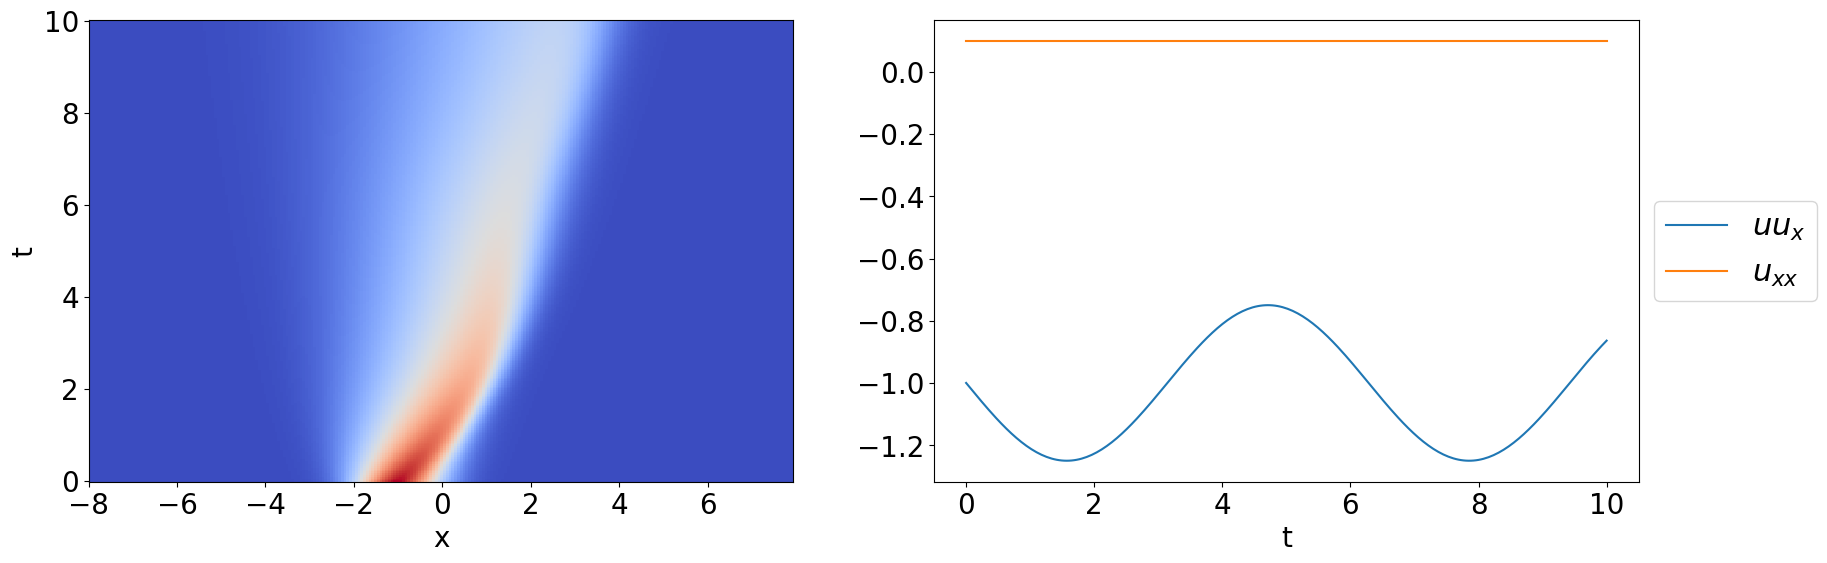

In [5]:
# Plot
fig=figure(figsize=(20,6))
X, T = np.meshgrid(x, t)

subplot(1,2,1)
pcolor(X, T, u.T, cmap=cm.coolwarm)
xlabel('x', fontsize = fontsize)
ylabel('t', fontsize = fontsize)
xticks(fontsize = fontsize)
yticks(fontsize = fontsize)
xlim([x[0],x[-1]])

subplot(1,2,2)
plot(t, uu_x_true, label=r'$uu_{x}$')
plot(t, u_xx_true, label=r'$u_{xx}$')

xticks(fontsize = fontsize)
yticks(fontsize = fontsize)
xlabel('t', fontsize = fontsize)
legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = fontsize+2)
# fig.tight_layout()
fig.savefig("burgers.png", dpi=200)

## Build the Regression Model

In [6]:
Ut, Theta, rhs_des = build_linear_system(u, dt, dx, D=4, P=3, time_diff = 'FD', space_diff = 'FD')

In [7]:
Theta_grouped = [real(Theta[j*n:(j+1)*n,:]) for j in range(m)]
Ut_grouped = [real(Ut[j*n:(j+1)*n]) for j in range(m)]
Xs = Theta_grouped
ys = Ut_grouped

In [8]:
xi, lam, loss, path, coef, remain = thresholdBGLSS_combined(Theta_grouped, Ut_grouped, niter = 600, burnin = 100, threshold1 = 0.02, threshold2 = 0.08)

0
20
Update:
0
Lambda2:
0.6122137571342935

Update:
1
Lambda2:
0.319037399534199

Update:
2
Lambda2:
0.1812936427594991

Update:
3
Lambda2:
0.11583857972477384

Update:
4
Lambda2:
0.08290835674451041

Update:
5
Lambda2:
0.06457885729102064

Update:
6
Lambda2:
0.053478480814130744

Update:
7
Lambda2:
0.046142486572931636

Update:
8
Lambda2:
0.0408642053925525

Update:
9
Lambda2:
0.0370227069713058

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
1

/home/yifan/Documents/code_equation_learn/Experiments/threshold_BGLSS.py:206: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  candidate_norms[i] = Norm(np.vstack(A[:,i] for A in As), loss_normalize)
/home/yifan/Documents/code_equation_learn/Experiments/threshold_BGLSS.py:23: RuntimeWarning: invalid value encountered in true_divide
  rate = np.sum(variance, axis=1)/np.sum(mean**2, axis=1)


GE: 
[1.39996415e+01 1.17503026e+00            nan 1.67543805e+00
 2.04983370e+00 3.80949957e-03            nan 2.04775966e+00
 5.20853666e-03            nan            nan            nan
            nan            nan            nan 3.05991570e+00
            nan            nan            nan            nan]
[5, 8]
0
2
Update:
0
Lambda2:
0.05648730417578824

Update:
1
Lambda2:
0.01182347783022627

Update:
2
Lambda2:
0.005317029214190319

Update:
3
Lambda2:
0.0035586305601696708

Update:
4
Lambda2:
0.0029194950500143787

Update:
5
Lambda2:
0.002611039037558741

Update:
6
Lambda2:
0.0025030564999622786

Update:
7
Lambda2:
0.0024157471607098194

Update:
8
Lambda2:
0.0024045004842897263

Update:
9
Lambda2:
0.002366219368385496

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91

In [9]:
Xi,Tol,Losses = TrainSGTRidge(Theta_grouped, Ut_grouped)
xi_sgtr = Xi[np.argmin(Losses)]

/home/yifan/Documents/code_equation_learn/Experiments/parametric_pde_find.py:601: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  candidate_norms[i] = Norm(np.vstack(A[:,i] for A in As), normalize)
/home/yifan/Documents/code_equation_learn/Experiments/parametric_pde_find.py:571: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W[biginds,i] = np.linalg.lstsq(Xs[i][:, biginds],ys[i])[0].reshape(len(biginds))


MSE:  3.947720442305277e-07


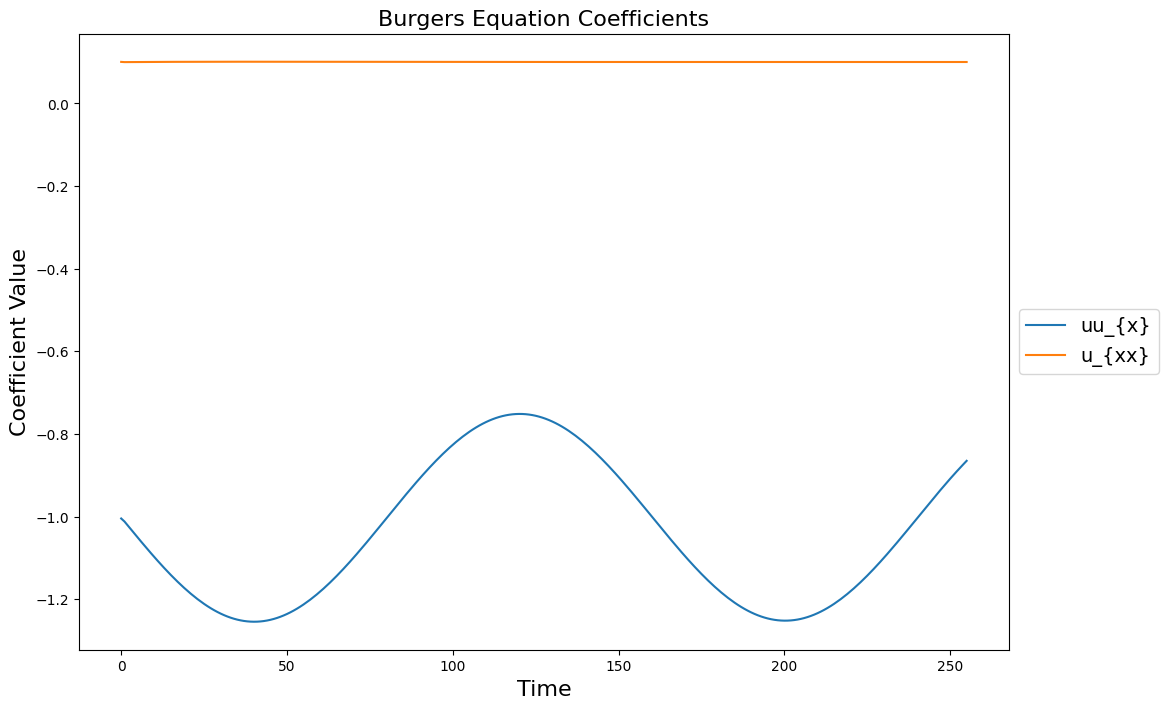

In [10]:
pylab.rcParams['figure.figsize'] = (12, 8)
for j in range(xi_sgtr.shape[0]): 
    if np.linalg.norm(xi_sgtr[j,:]) > 10**-10:
        plot(xi_sgtr[j,:], label = rhs_des[j])

title('Burgers Equation Coefficients', fontsize = 16)
xlabel('Time', fontsize = 16)
ylabel('Coefficient Value', fontsize = 16)
legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)

i_uu_x = [i for i in range(len(rhs_des)) if rhs_des[i] == 'uu_{x}'][0]
i_u_xx = [i for i in range(len(rhs_des)) if rhs_des[i] == 'u_{xx}'][0]
xi_true = np.zeros(xi_sgtr.shape)
xi_true[i_uu_x] = uu_x_true
xi_true[i_u_xx] = u_xx_true
mse_clean_sgtr = Norm(xi_sgtr-xi_true)**2/(m*16)

print('MSE: ', mse_clean_sgtr)

In [11]:
groups = [[j+20*i for i in range(m)] for j in range(20)]

Xi_lasso,Lam_lasso,Losses_lasso,Histories_Lasso = TrainGroupLasso(Theta_grouped, Ut_grouped, groups)
xi_lasso = Xi_lasso[np.argmin(Losses_lasso)]

/home/yifan/Documents/code_equation_learn/Experiments/parametric_pde_find.py:456: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  candidate_norms[i] = Norm(np.vstack(A[:,i] for A in As), normalize)
/home/yifan/Documents/code_equation_learn/Experiments/parametric_pde_find.py:436: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  z[nz_coords,j] = np.linalg.lstsq(As[j][:, nz_coords], bs[j])[0][:,0]


MSE:  9.459636214438435e-07


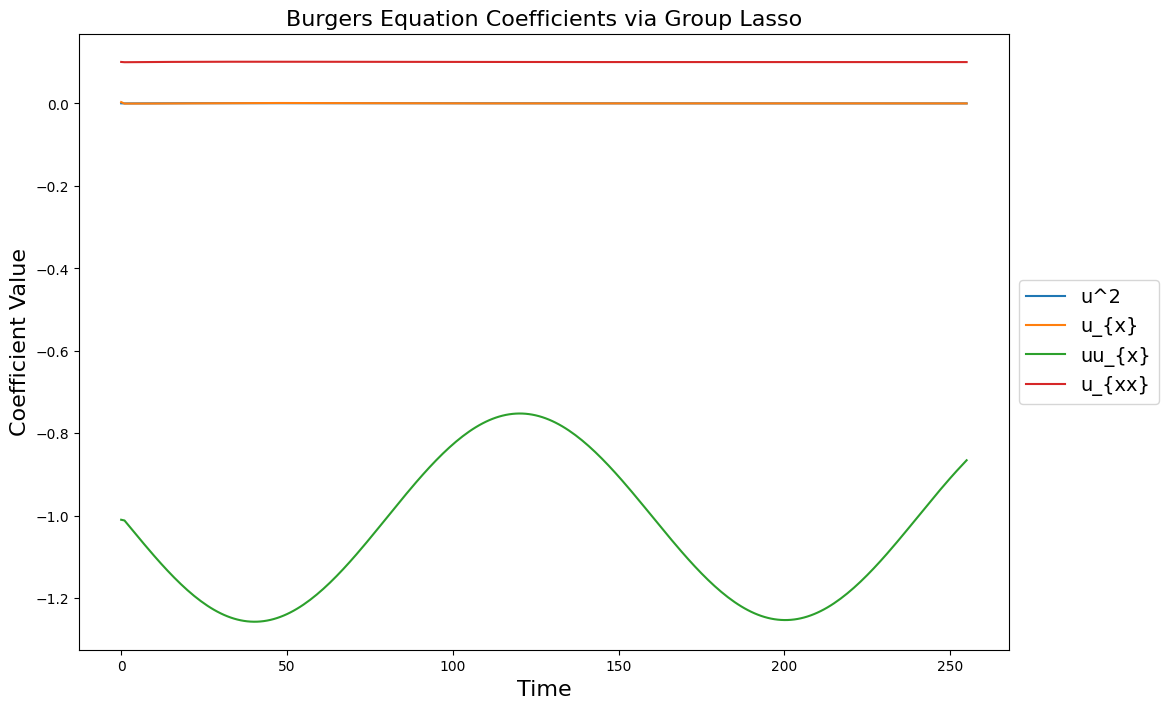

In [12]:
pylab.rcParams['figure.figsize'] = (12, 8)
for j in range(xi_lasso.shape[0]): 
    if np.linalg.norm(xi_lasso[j,:]) > 10**-10:
        plot(xi_lasso[j,:], label = rhs_des[j])

title('Burgers Equation Coefficients via Group Lasso', fontsize = 16)
xlabel('Time', fontsize = 16)
ylabel('Coefficient Value', fontsize = 16)
legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)

mse_clean_gl = Norm(xi_lasso-xi_true)**2/(m*16)
print('MSE: ', mse_clean_gl)

/tmp/ipykernel_6889/3204459531.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(coef[7, :], color = 'r', kde=True)


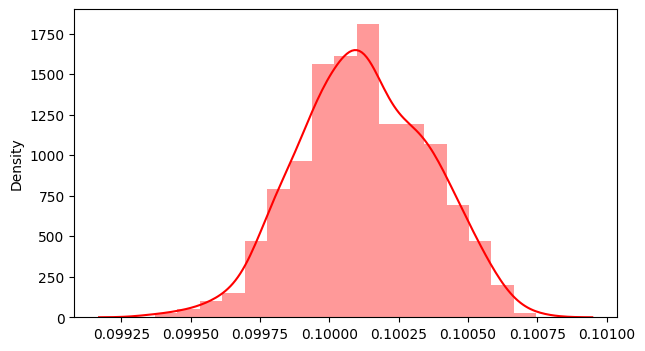

In [13]:
pylab.rcParams['figure.figsize'] = (7, 4)
fig, ax = plt.subplots()
sns.distplot(coef[7, :], color = 'r', kde=True)
fig.savefig("hist.png", dpi=200)

In [14]:
np.median(coef[7, :])

0.10011610477601783

/home/yifan/Documents/code_equation_learn/Experiments/threshold_BGLSS.py:35: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mb, bins=bins, kde=kde)


[0.10009149 0.10013647]
0.10011623121089809


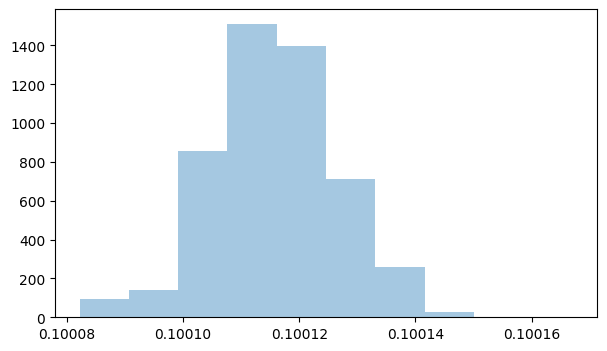

In [15]:
pylab.rcParams['figure.figsize'] = (7, 4)
fig, ax = plt.subplots()
ci, mean = bootstrapMedian(coef[7, :], show_hist = True, bins = 10)
fig.savefig("hist_bootstrap.png", dpi=200)
print(ci)
print(mean)

In [16]:
ci, means = getCI(coef, m)

In [17]:
xi.shape

(2, 256)

In [18]:
d = len(rhs_des)
i_uu_x = [i for i in range(len(rhs_des)) if rhs_des[i] == 'uu_{x}'][0]
i_u_xx = [i for i in range(len(rhs_des)) if rhs_des[i] == 'u_{xx}'][0]
xi_true = np.zeros((d, m))
xi_true[i_uu_x] = uu_x_true
xi_true[i_u_xx] = u_xx_true

In [19]:
std = np.std(coef, axis=1, ddof=1).reshape(m,xi.shape[0]).T

In [20]:
np.mean(std[0,:])

0.0031095225087725948

In [21]:
np.mean(-ci[0][0,:]+ci[1][0,:])

0.0006839453036485664

MSE:  3.114910480012595e-07


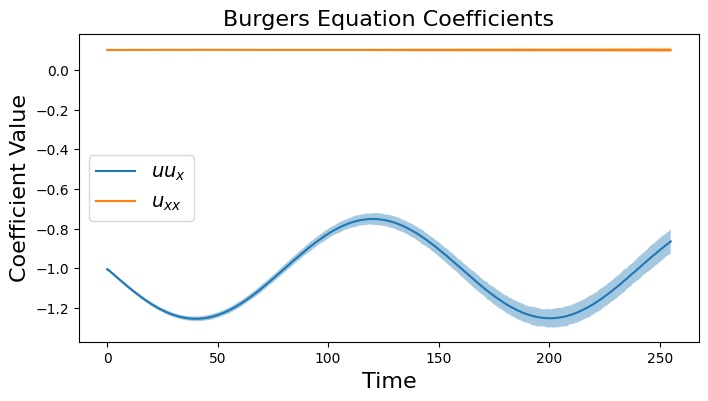

In [22]:
xi_bglss = np.zeros((d, m))

pylab.rcParams['figure.figsize'] = (8, 4)
fig, ax = plt.subplots()
for j in range(xi.shape[0]): 
    if np.linalg.norm(xi[j,:]) > 10**-10:
        plot(xi[j,:], label = r'$'+rhs_des[remain[j]]+'$')
        fill_between(range(len(xi[j,:])), xi[j,:]-10*std[j, :], xi[j,:]+10*std[j, :], alpha=0.4)
        xi_bglss[remain[j], :] = xi[j,:]

title('Burgers Equation Coefficients', fontsize = 16)
xlabel('Time', fontsize = 16)
ylabel('Coefficient Value', fontsize = 16)
legend(loc='center left', fontsize = 14)

mse_clean_tbglss = Norm(xi_bglss-xi_true)**2/(m*len(rhs_des))
print('MSE: ', mse_clean_tbglss)
plt.show()
fig.savefig("tbglss-clean.png", dpi=200)

In [23]:
totalError(coef,m)

5.3104270746213824e-05

In [24]:
loss

-754507.0803677542

In [27]:
un = u + 0.01*np.std(u)*np.random.randn(n,m)

In [28]:
# Build linear systems
wx = 10 
wt = 10 

Utn, Thetan, rhs_des = build_linear_system(un, dt, dx, D=4, P=3, time_diff = 'poly',
                                       deg_x = 6, deg_t = 4, 
                                       width_x = wx, width_t = wt)
n2 = n - 2*wx
m2 = m - 2*wt

In [29]:
# Group by timestep
Thetan_grouped = [real(Thetan[j*n2:(j+1)*n2,:]) for j in range(m2)]
Utn_grouped = [real(Utn[j*n2:(j+1)*n2]) for j in range(m2)]

In [30]:
xi_n, lam_n, loss_n, path_n, coef_n, remain_n = thresholdBGLSS(Thetan_grouped, Utn_grouped, niter = 600, burnin = 100, threshold = 10**-2)

0
20
Update:
0
Lambda2:
0.8365031768452252

Update:
1
Lambda2:
0.6474204732640653

Update:
2
Lambda2:
0.4902378447223655

Update:
3
Lambda2:
0.37352919614117513

Update:
4
Lambda2:
0.3017707961181153

Update:
5
Lambda2:
0.2524764935417412

Update:
6
Lambda2:
0.22003850572568315

Update:
7
Lambda2:
0.19639471261925007

Update:
8
Lambda2:
0.1797150656208436

Update:
9
Lambda2:
0.16678034242063397

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177

/home/yifan/Documents/code_equation_learn/Experiments/threshold_BGLSS.py:206: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  candidate_norms[i] = Norm(np.vstack(A[:,i] for A in As), loss_normalize)


[1, 3, 4, 5, 7, 8, 15]
0
7
Update:
0
Lambda2:
0.5712776915237223

Update:
1
Lambda2:
0.34206052030411754

Update:
2
Lambda2:
0.24646257681806186

Update:
3
Lambda2:
0.19803696217179176

Update:
4
Lambda2:
0.17566598220958007

Update:
5
Lambda2:
0.1615887946094853

Update:
6
Lambda2:
0.15521151829584354

Update:
7
Lambda2:
0.151331740075441

Update:
8
Lambda2:
0.14788890041208297

Update:
9
Lambda2:
0.14614831976256762

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171

In [31]:
remain_n

[1, 3, 4, 5, 7, 8, 15]

In [32]:
ci_n, means_n = getCI(coef_n, m2)

MSE:  0.021397030887527167


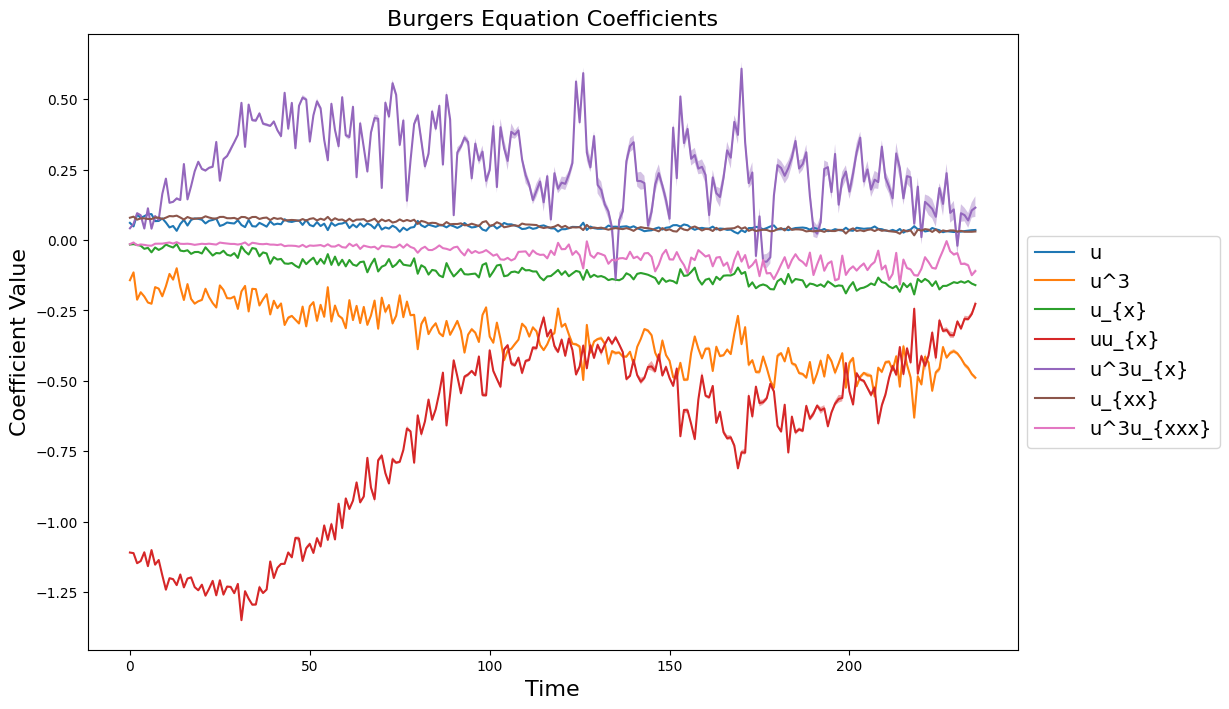

In [33]:
xi_bglss = np.zeros((d, m2))

pylab.rcParams['figure.figsize'] = (12, 8)
for j in range(xi_n.shape[0]): 
    if np.linalg.norm(xi_n[j,:]) > 10**-10:
        plot(xi_n[j,:], label = rhs_des[remain_n[j]])
        fill_between(range(len(xi_n[j,:])), ci_n[1][j, :], ci_n[0][j, :], alpha=0.4)
        xi_bglss[remain_n[j], :] = xi_n[j,:]

title('Burgers Equation Coefficients', fontsize = 16)
xlabel('Time', fontsize = 16)
ylabel('Coefficient Value', fontsize = 16)
legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)

mse_noise_tbglss = Norm(xi_bglss-xi_true[:,wt:-wt])**2/(m2*len(rhs_des))
print('MSE: ', mse_noise_tbglss)

In [34]:
groupError(coef_n, m2)

array([0.02298008, 0.01641001, 0.01575961, 0.00681007, 0.40802701,
       0.00727826, 0.13986085])

In [35]:
totalError(coef_n, m2)

0.6171258915514122

In [36]:
X_n1, Lam_n1, Losses_n1, Coef_n1, Remain_n1, TE_n1, Threshold_n1 = TrainBGLSS_findt1(Thetan_grouped, Utn_grouped, num_threshold = 21, max_threshold = 0.1, min_threshold = 0, niter = 600, burnin = 100)

[0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1]
threshold:
0.0
0
20
Update:
0
Lambda2:
0.8365031768452252

Update:
1
Lambda2:
0.6474204732640653

Update:
2
Lambda2:
0.4902378447223655

Update:
3
Lambda2:
0.37352919614117513

Update:
4
Lambda2:
0.3017707961181153

Update:
5
Lambda2:
0.2524764935417412

Update:
6
Lambda2:
0.22003850572568315

Update:
7
Lambda2:
0.19639471261925007

Update:
8
Lambda2:
0.1797150656208436

Update:
9
Lambda2:
0.16678034242063397

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
1

In [37]:
MSEs_n1 = getMSEs(X_n1, Remain_n1, xi_true[:,wt:-wt])

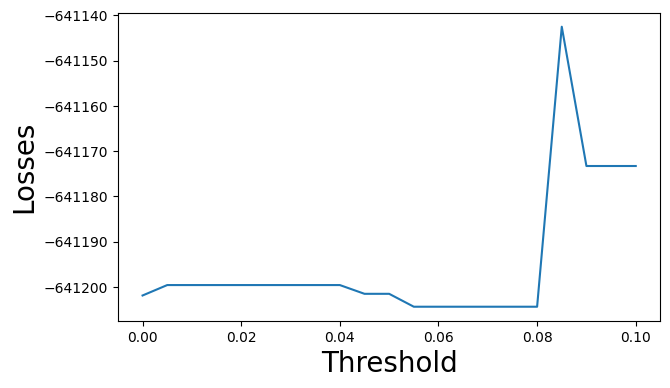

In [38]:
pylab.rcParams['figure.figsize'] = (7, 4)
fig, ax = plt.subplots()
ax.plot(Threshold_n1, Losses_n1, label = 'threshold1 = 0')
xlabel('Threshold', fontsize = fontsize)
ylabel('Losses', fontsize = fontsize)
fig.savefig("Losses-1.png", dpi=200)

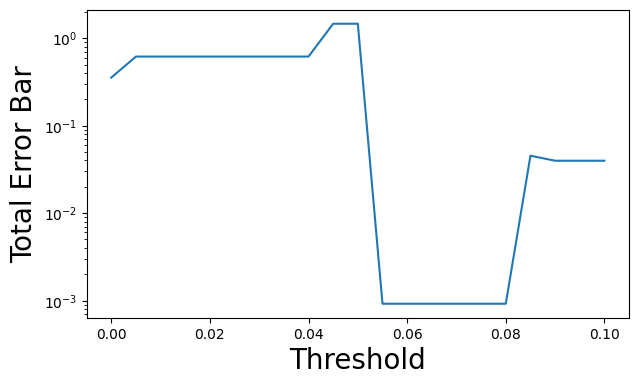

In [39]:
pylab.rcParams['figure.figsize'] = (7, 4)
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.plot(Threshold_n1, TE_n1, label = 'threshold1 = 0')
xlabel('Threshold', fontsize = fontsize)
ylabel('Total Error Bar', fontsize = fontsize)
pylab.show()
fig.savefig("TE-1.png", dpi=200)

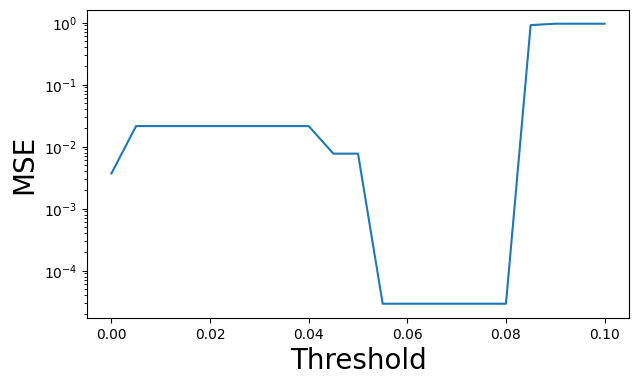

In [40]:
pylab.rcParams['figure.figsize'] = (7, 4)
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.plot(Threshold_n1, MSEs_n1, label = 'threshold1 = 0')
xlabel('Threshold', fontsize = fontsize)
ylabel('MSE', fontsize = fontsize)
pylab.show()
fig.savefig("MSE-1.png", dpi=200)

In [41]:
X_n2, Lam_n2, Losses_n2, Coef_n2, Remain_n2, TE_n2, Threshold_n2 = TrainBGLSS_findt2(Thetan_grouped, Utn_grouped, threshold1 = 0, num_threshold = 21, max_threshold = 0.23, min_threshold = 0.03, niter = 600, burnin = 100)

[0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23]
threshold:
0.03
0
20
Update:
0
Lambda2:
0.8365031768452252

Update:
1
Lambda2:
0.6474204732640653

Update:
2
Lambda2:
0.4902378447223655

Update:
3
Lambda2:
0.37352919614117513

Update:
4
Lambda2:
0.3017707961181153

Update:
5
Lambda2:
0.2524764935417412

Update:
6
Lambda2:
0.22003850572568315

Update:
7
Lambda2:
0.19639471261925007

Update:
8
Lambda2:
0.1797150656208436

Update:
9
Lambda2:
0.16678034242063397

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
14

/home/yifan/Documents/code_equation_learn/Experiments/threshold_BGLSS.py:23: RuntimeWarning: invalid value encountered in true_divide
  rate = np.sum(variance, axis=1)/np.sum(mean**2, axis=1)


GE: 
[12.36567024  0.04241919         nan  0.10988221  0.25054409  0.01536714
         nan  0.21165903  0.02002459         nan         nan         nan
         nan         nan         nan  0.07904044  0.0471975          nan
         nan         nan]
[5, 8]
0
2
Update:
0
Lambda2:
0.21377129994846278

Update:
1
Lambda2:
0.09205364739998058

Update:
2
Lambda2:
0.06052256378558885

Update:
3
Lambda2:
0.049552594426161646

Update:
4
Lambda2:
0.04431979461814192

Update:
5
Lambda2:
0.041876170705012164

Update:
6
Lambda2:
0.04036360060574801

Update:
7
Lambda2:
0.039688009616836335

Update:
8
Lambda2:
0.03941430049808733

Update:
9
Lambda2:
0.039126539107642376

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
1

In [42]:
X_n3, Lam_n3, Losses_n3, Coef_n3, Remain_n3, TE_n3, Threshold_n3 = TrainBGLSS_findt2(Thetan_grouped, Utn_grouped, threshold1 = 0.03, num_threshold = 21, max_threshold = 0.22, min_threshold = 0.02, niter = 600, burnin = 100)

[0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09000000000000001, 0.1, 0.11, 0.12000000000000001, 0.13, 0.13999999999999999, 0.15, 0.16, 0.16999999999999998, 0.18, 0.19, 0.19999999999999998, 0.21, 0.22]
threshold:
0.02
0
20
Update:
0
Lambda2:
0.8365031768452252

Update:
1
Lambda2:
0.6474204732640653

Update:
2
Lambda2:
0.4902378447223655

Update:
3
Lambda2:
0.37352919614117513

Update:
4
Lambda2:
0.3017707961181153

Update:
5
Lambda2:
0.2524764935417412

Update:
6
Lambda2:
0.22003850572568315

Update:
7
Lambda2:
0.19639471261925007

Update:
8
Lambda2:
0.1797150656208436

Update:
9
Lambda2:
0.16678034242063397

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
12

In [43]:
X_n4, Lam_n4, Losses_n4, Coef_n4, Remain_n4, TE_n4, Threshold_n4 = TrainBGLSS_findt2(Thetan_grouped, Utn_grouped, threshold1 = 0.07, num_threshold = 21, max_threshold = 0.22, min_threshold = 0.02, niter = 600, burnin = 100)

[0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09000000000000001, 0.1, 0.11, 0.12000000000000001, 0.13, 0.13999999999999999, 0.15, 0.16, 0.16999999999999998, 0.18, 0.19, 0.19999999999999998, 0.21, 0.22]
threshold:
0.02
0
20
Update:
0
Lambda2:
0.8365031768452252

Update:
1
Lambda2:
0.6474204732640653

Update:
2
Lambda2:
0.4902378447223655

Update:
3
Lambda2:
0.37352919614117513

Update:
4
Lambda2:
0.3017707961181153

Update:
5
Lambda2:
0.2524764935417412

Update:
6
Lambda2:
0.22003850572568315

Update:
7
Lambda2:
0.19639471261925007

Update:
8
Lambda2:
0.1797150656208436

Update:
9
Lambda2:
0.16678034242063397

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
12

In [44]:
MSEs_n2 = getMSEs(X_n2, Remain_n2, xi_true[:,wt:-wt])
MSEs_n3 = getMSEs(X_n3, Remain_n3, xi_true[:,wt:-wt])
MSEs_n4 = getMSEs(X_n4, Remain_n4, xi_true[:,wt:-wt])

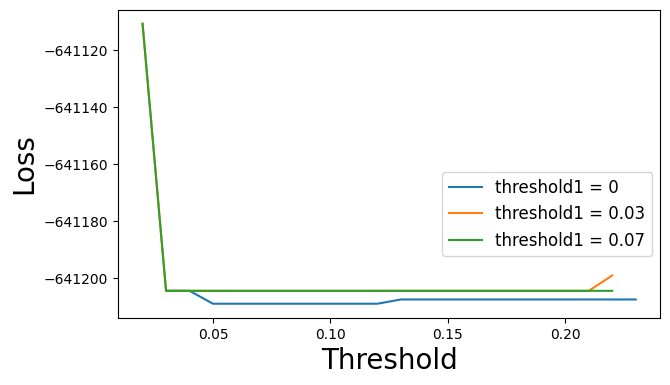

In [45]:
pylab.rcParams['figure.figsize'] = (7, 4)
fig, ax = plt.subplots()
plot(Threshold_n2, Losses_n2, label = 'threshold1 = 0')
plot(Threshold_n3, Losses_n3, label = 'threshold1 = 0.03')
plot(Threshold_n4, Losses_n4, label = 'threshold1 = 0.07')
xlabel('Threshold', fontsize = fontsize)
ylabel('Loss', fontsize = fontsize)
legend( bbox_to_anchor=(1, 0.5), fontsize = 12)
pylab.show()
fig.savefig("Loss-2.png", dpi=200)

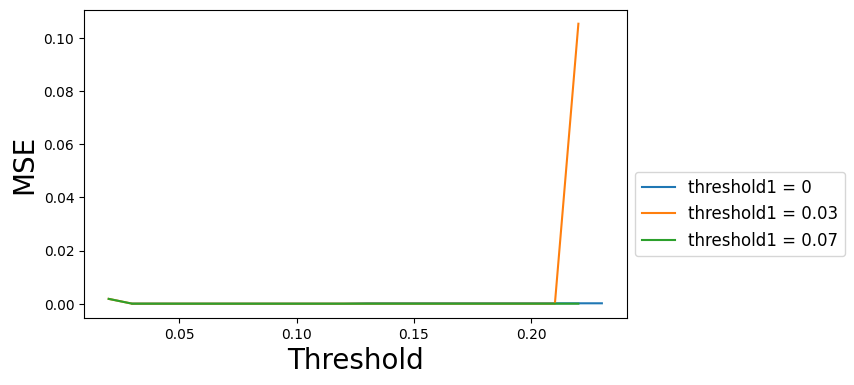

In [46]:
pylab.rcParams['figure.figsize'] = (7, 4)
fig, ax = plt.subplots()
plot(Threshold_n2, MSEs_n2, label = 'threshold1 = 0')
plot(Threshold_n3, MSEs_n3, label = 'threshold1 = 0.03')
plot(Threshold_n4, MSEs_n4, label = 'threshold1 = 0.07')
xlabel('Threshold', fontsize = fontsize)
ylabel('MSE', fontsize = fontsize)
legend( bbox_to_anchor=(1, 0.5), fontsize = 12)
pylab.show()
fig.savefig("MSE-2.png", dpi=200)

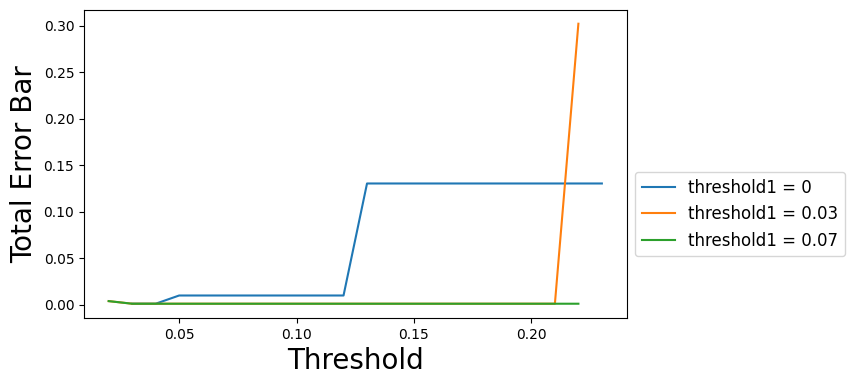

In [47]:
pylab.rcParams['figure.figsize'] = (7, 4)
fig, ax = plt.subplots()
plot(Threshold_n2, TE_n2, label = 'threshold1 = 0')
plot(Threshold_n3, TE_n3, label = 'threshold1 = 0.03')
plot(Threshold_n4, TE_n4, label = 'threshold1 = 0.07')
xlabel('Threshold', fontsize = fontsize)
ylabel('Total Error Bar', fontsize = fontsize)
legend( bbox_to_anchor=(1, 0.5), fontsize = 12)
pylab.show()
fig.savefig("MSE-2.png", dpi=200)

MSE:  0.00017321560341076206


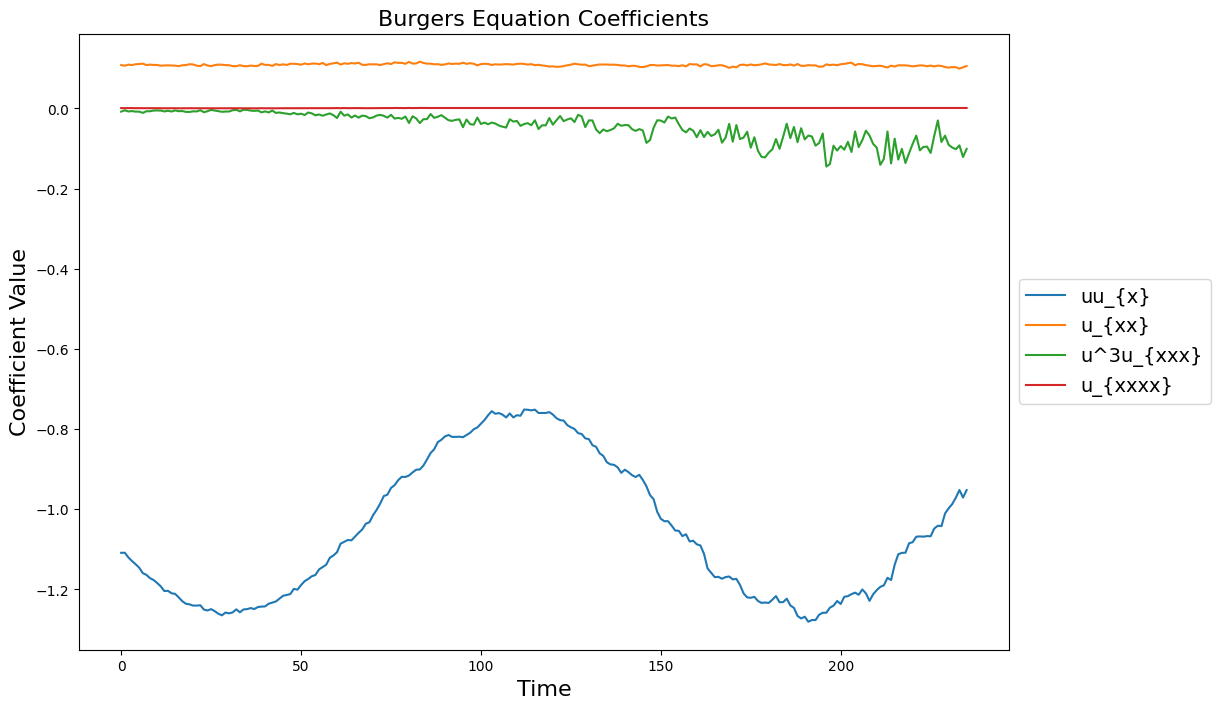

In [48]:
xi_n2 = X_n2[-1]
remain_n2 = Remain_n2[-1]
xi_bglss = np.zeros((d, m2))

pylab.rcParams['figure.figsize'] = (12, 8)
for j in range(xi_n2.shape[0]): 
    if np.linalg.norm(xi_n2[j,:]) > 10**-10:
        plot(xi_n2[j,:], label = rhs_des[remain_n2[j]])
#         fill_between(range(len(xi_n[j,:])), ci_n[1][j, :], ci_n[0][j, :], alpha=0.4)
        xi_bglss[remain_n2[j], :] = xi_n2[j,:]

title('Burgers Equation Coefficients', fontsize = 16)
xlabel('Time', fontsize = 16)
ylabel('Coefficient Value', fontsize = 16)
legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)

mse_noise_tbglss = Norm(xi_bglss-xi_true[:,wt:-wt])**2/(m2*len(rhs_des))
print('MSE: ', mse_noise_tbglss)

In [49]:
xi_tb_n, lam_tb_n, loss_tb_n, path_tb_n, coef_tb_n, remain_tb_n = thresholdBGLSS_combined(Thetan_grouped, Utn_grouped, niter = 600, burnin = 100, threshold1 = 0.02, threshold2 = 0.08)

0
20
Update:
0
Lambda2:
0.8365031768452252

Update:
1
Lambda2:
0.6474204732640653

Update:
2
Lambda2:
0.4902378447223655

Update:
3
Lambda2:
0.37352919614117513

Update:
4
Lambda2:
0.3017707961181153

Update:
5
Lambda2:
0.2524764935417412

Update:
6
Lambda2:
0.22003850572568315

Update:
7
Lambda2:
0.19639471261925007

Update:
8
Lambda2:
0.1797150656208436

Update:
9
Lambda2:
0.16678034242063397

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177

In [50]:
std_tb_n = np.std(coef_tb_n, axis=1, ddof=1).reshape(m2,xi_tb_n.shape[0]).T

MSE:  3.640485051028272e-05


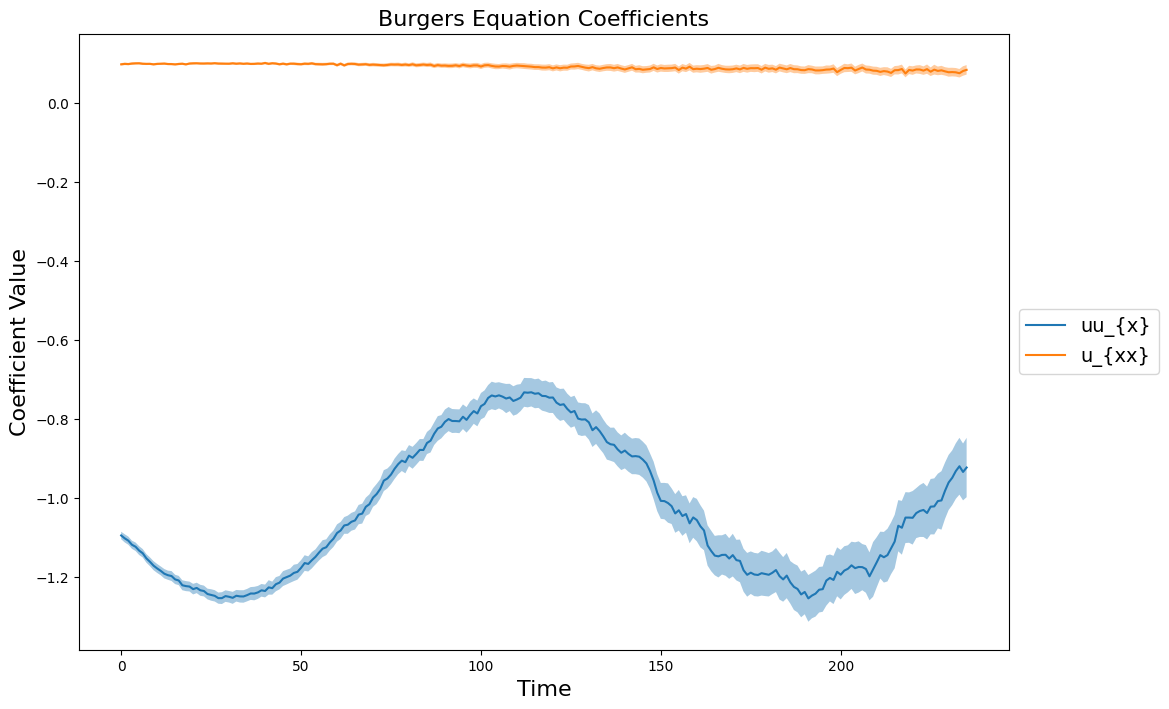

In [51]:
xi_bglss_n = np.zeros((d, m2))

pylab.rcParams['figure.figsize'] = (12, 8)
for j in range(xi_tb_n.shape[0]): 
    if np.linalg.norm(xi_tb_n[j,:]) > 10**-10:
        plot(xi_tb_n[j,:], label = rhs_des[remain_tb_n[j]])
        fill_between(range(len(xi_tb_n[j,:])), xi_tb_n[j,:]-3*std_tb_n[j, :], xi_tb_n[j,:]+3*std_tb_n[j, :], alpha=0.4)
        xi_bglss_n[remain_tb_n[j], :] = xi_tb_n[j,:]

title('Burgers Equation Coefficients', fontsize = 16)
xlabel('Time', fontsize = 16)
ylabel('Coefficient Value', fontsize = 16)
legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)

mse_noise_tbglss = Norm(xi_bglss_n-xi_true[:,wt:-wt])**2/(m2*16)
print('MSE: ', mse_noise_tbglss)

In [52]:
Xi_sgtr_n,Tol_sgtr_n,Losses_sgtr_n = TrainSGTRidge(Thetan_grouped, Utn_grouped)
xi_sgtr_n = Xi_sgtr_n[np.argmin(Losses_sgtr_n)]

/home/yifan/Documents/code_equation_learn/Experiments/parametric_pde_find.py:601: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  candidate_norms[i] = Norm(np.vstack(A[:,i] for A in As), normalize)
/home/yifan/Documents/code_equation_learn/Experiments/parametric_pde_find.py:571: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  W[biginds,i] = np.linalg.lstsq(Xs[i][:, biginds],ys[i])[0].reshape(len(biginds))


MSE:  3.501840605464812e-05


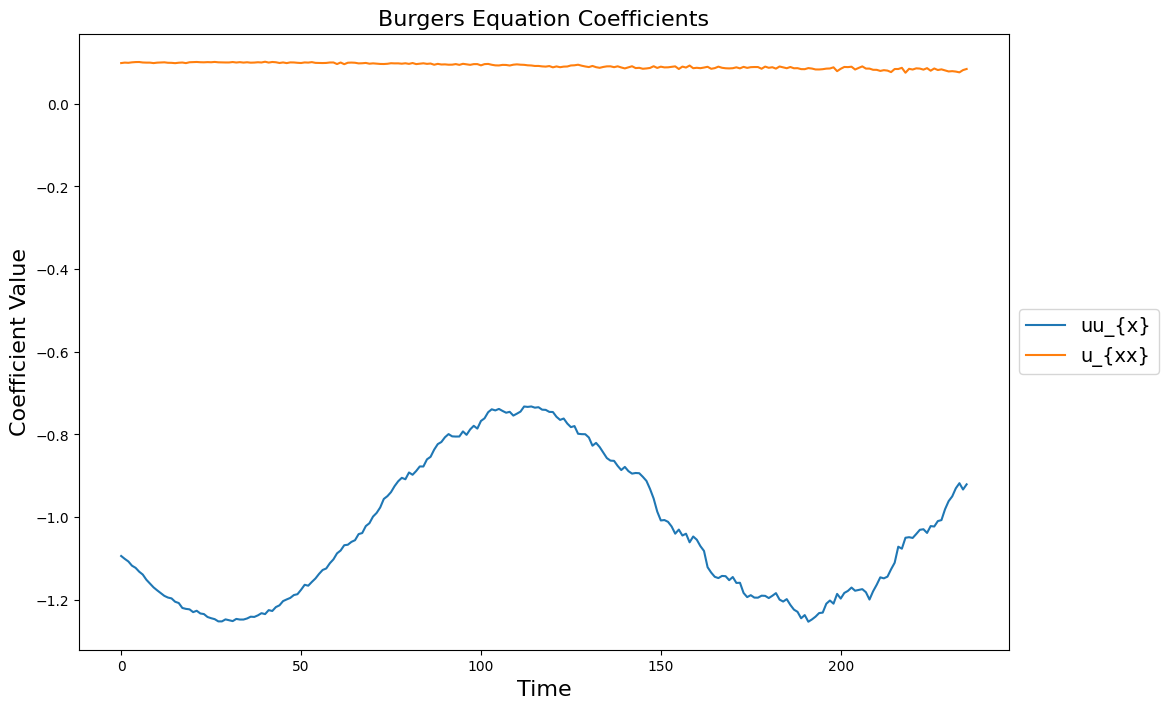

In [53]:
pylab.rcParams['figure.figsize'] = (12, 8)
for j in range(xi_sgtr_n.shape[0]): 
    if np.linalg.norm(xi_sgtr_n[j,:]) > 10**-10:
        plot(xi_sgtr_n[j,:], label = rhs_des[j])

title('Burgers Equation Coefficients', fontsize = 16)
xlabel('Time', fontsize = 16)
ylabel('Coefficient Value', fontsize = 16)
legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)

mse_noise_sgtr = Norm(xi_sgtr_n-xi_true[:,wt:-wt])**2/(m2*16)

print('MSE: ', mse_noise_sgtr)

In [54]:
groups = [[j+20*i for i in range(m2)] for j in range(20)]
Xi_lasso_n,Lam_lasso_n,Losses_lasso_n,Histories_Lasso_n  = TrainGroupLasso(Thetan_grouped, Utn_grouped, groups)
xi_lasso_n = Xi_lasso_n[np.argmin(Losses_lasso_n)]

/home/yifan/Documents/code_equation_learn/Experiments/parametric_pde_find.py:456: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  candidate_norms[i] = Norm(np.vstack(A[:,i] for A in As), normalize)
/home/yifan/Documents/code_equation_learn/Experiments/parametric_pde_find.py:436: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  z[nz_coords,j] = np.linalg.lstsq(As[j][:, nz_coords], bs[j])[0][:,0]


MSE:  0.0009787307866567163


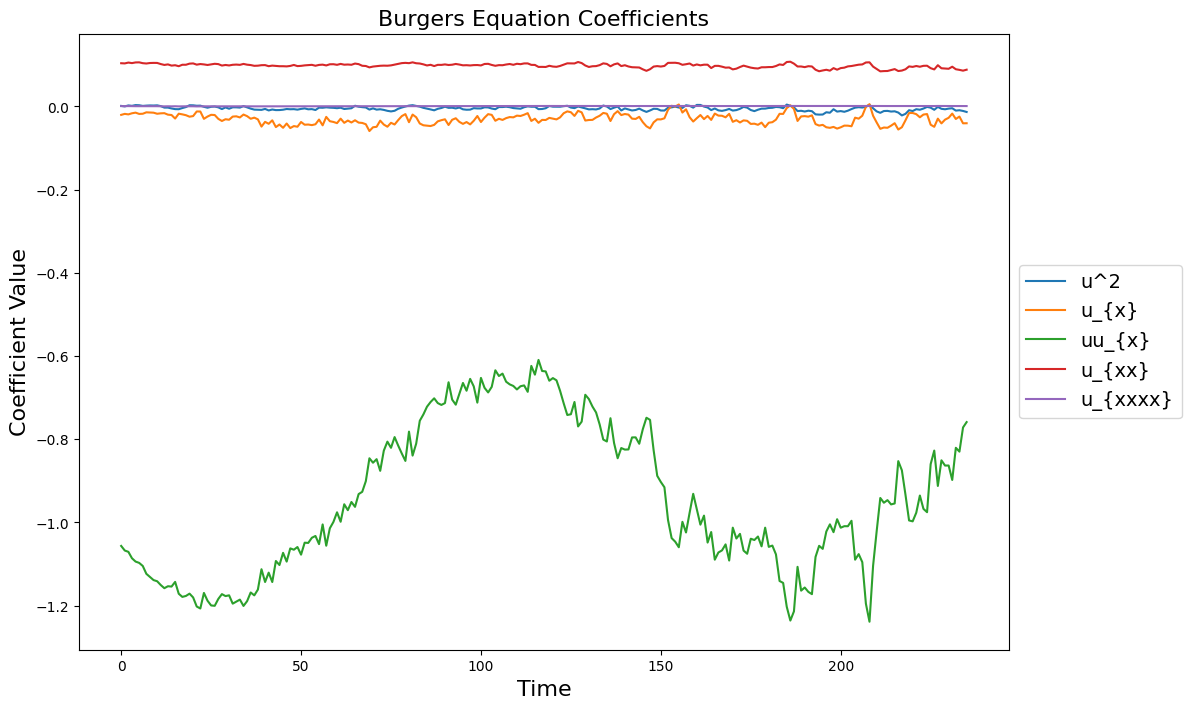

In [55]:
pylab.rcParams['figure.figsize'] = (12, 8)
for j in range(xi_lasso_n.shape[0]): 
    if np.linalg.norm(xi_lasso_n[j,:]) > 10**-10:
        plot(xi_lasso_n[j,:], label = rhs_des[j])

title('Burgers Equation Coefficients', fontsize = 16)
xlabel('Time', fontsize = 16)
ylabel('Coefficient Value', fontsize = 16)
legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)

mse_noise_gl = Norm(xi_lasso_n-xi_true[:,wt:-wt])**2/(m2*16)
print('MSE: ', mse_noise_gl)

In [56]:
print(loss, loss_tb_n)

-754507.0803677542 -641204.3869290251


In [68]:
un = u + 0.05*np.std(u)*np.random.randn(n,m)

In [69]:
# Build linear systems
wx = 10 
wt = 10 

Utn, Thetan, rhs_des = build_linear_system(un, dt, dx, D=4, P=3, time_diff = 'poly',
                                       deg_x = 6, deg_t = 4, 
                                       width_x = wx, width_t = wt)
n2 = n - 2*wx
m2 = m - 2*wt

In [70]:
# Group by timestep
Thetan_grouped2 = [real(Thetan[j*n2:(j+1)*n2,:]) for j in range(m2)]
Utn_grouped2 = [real(Utn[j*n2:(j+1)*n2]) for j in range(m2)]

In [71]:
xi_tb_n2, lam_tb_n2, loss_tb_n2, path_tb_n2, coef_tb_n2, remain_tb_n2 = thresholdBGLSS_combined(Thetan_grouped2, Utn_grouped2, niter = 600, burnin = 100, threshold1 = 0.01, threshold2 = 0.08)

0
20
Update:
0
Lambda2:
1.1792075970695768

Update:
1
Lambda2:
1.386916283009264

Update:
2
Lambda2:
1.6146550365748467

Update:
3
Lambda2:
1.8739577298783903

Update:
4
Lambda2:
2.167571212280392

Update:
5
Lambda2:
2.4835088589064505

Update:
6
Lambda2:
2.79513238685742

Update:
7
Lambda2:
3.124379021777873

Update:
8
Lambda2:
3.461033228637247

Update:
9
Lambda2:
3.769162556936263

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
18

In [72]:
std_tb_n2 = np.std(coef_tb_n2, axis=1, ddof=1).reshape(m2,xi_tb_n2.shape[0]).T

MSE:  0.08241759339842762


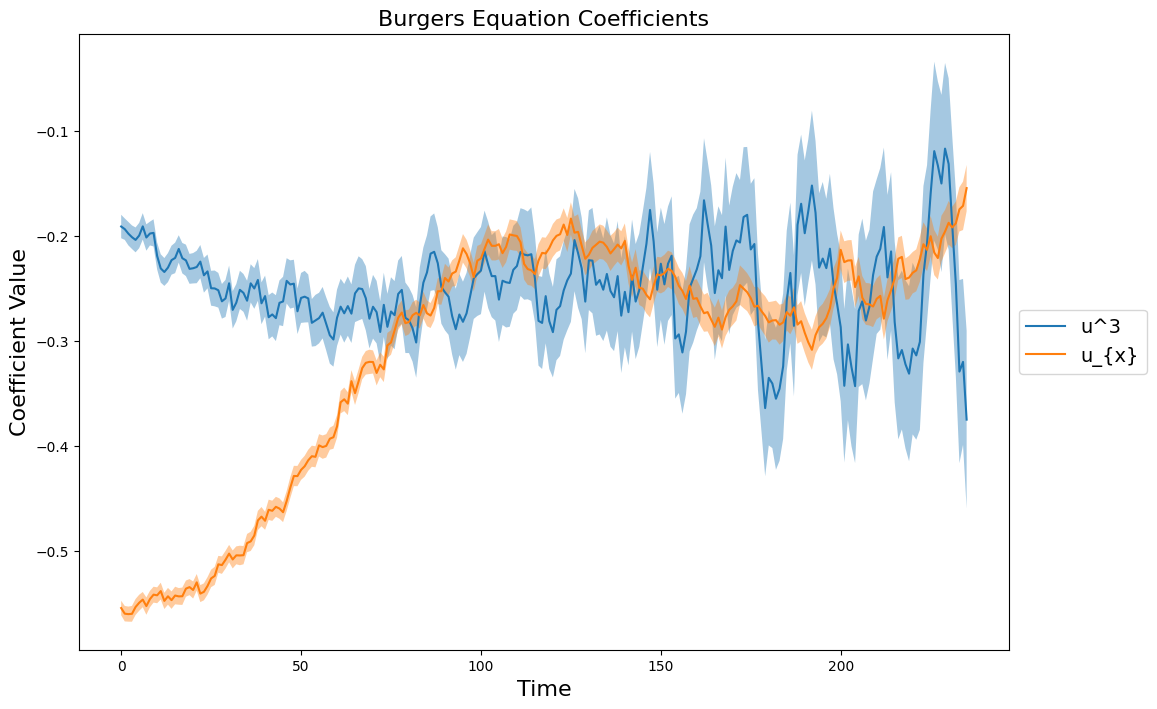

In [73]:
xi_bglss_n2 = np.zeros(xi_true[:,wt:-wt].shape)

pylab.rcParams['figure.figsize'] = (12, 8)
for j in range(xi_tb_n2.shape[0]): 
    if np.linalg.norm(xi_tb_n2[j,:]) > 10**-10:
        plot(xi_tb_n2[j,:], label = rhs_des[remain_tb_n2[j]])
        fill_between(range(len(xi_tb_n2[j,:])), xi_tb_n2[j,:]-std_tb_n2[j, :], xi_tb_n2[j,:]+std_tb_n2[j, :], alpha=0.4)
        xi_bglss_n2[remain_tb_n2[j], :] = xi_tb_n2[j,:]

title('Burgers Equation Coefficients', fontsize = 16)
xlabel('Time', fontsize = 16)
ylabel('Coefficient Value', fontsize = 16)
legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)

mse_noise_tbglss = Norm(xi_bglss_n2-xi_true[:,wt:-wt])**2/(m2*16)
print('MSE: ', mse_noise_tbglss)

In [74]:
Xi_sgtr_n2,Tol_sgtr_n2,Losses_sgtr_n2 = TrainSGTRidge(Thetan_grouped2, Utn_grouped2)
xi_sgtr_n2 = Xi_sgtr_n2[np.argmin(Losses_sgtr_n2)]

MSE:  0.3550283281930872


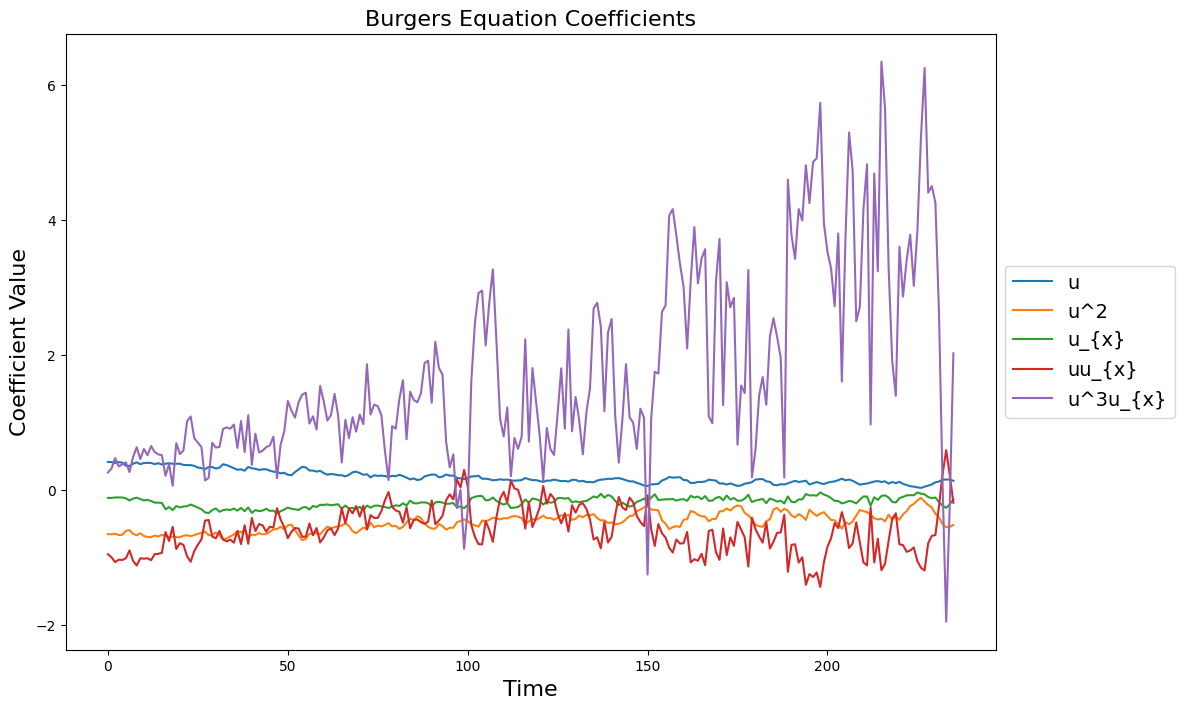

In [75]:
pylab.rcParams['figure.figsize'] = (12, 8)
for j in range(xi_sgtr_n2.shape[0]): 
    if np.linalg.norm(xi_sgtr_n2[j,:]) > 10**-10:
        plot(xi_sgtr_n2[j,:], label = rhs_des[j])

title('Burgers Equation Coefficients', fontsize = 16)
xlabel('Time', fontsize = 16)
ylabel('Coefficient Value', fontsize = 16)
legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)

mse_noise_sgtr = Norm(xi_sgtr_n2-xi_true[:,wt:-wt])**2/(m2*16)

print('MSE: ', mse_noise_sgtr)

In [76]:
groups = [[j+20*i for i in range(m2)] for j in range(20)]
Xi_lasso_n2,Lam_lasso_n2,Losses_lasso_n2,Histories_Lasso_n2  = TrainGroupLasso(Thetan_grouped2, Utn_grouped2, groups)
xi_lasso_n2 = Xi_lasso_n2[np.argmin(Losses_lasso_n2)]

MSE:  0.02334281472225239


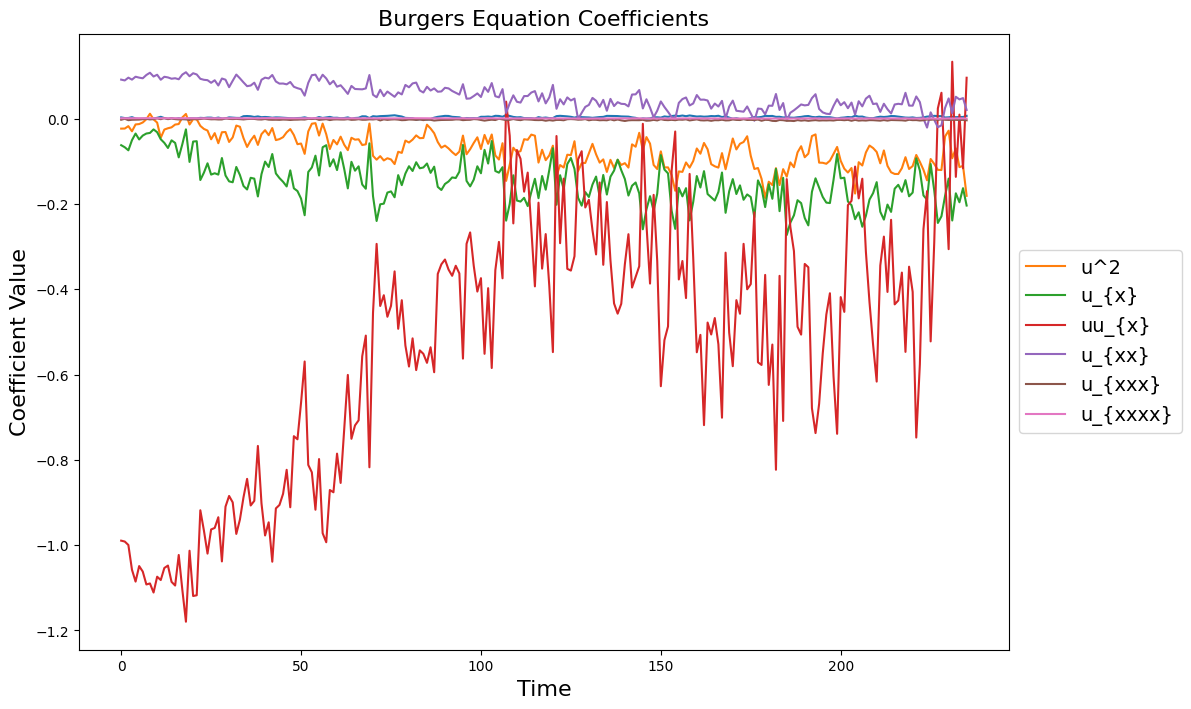

In [77]:
pylab.rcParams['figure.figsize'] = (12, 8)
for j in range(xi_lasso_n2.shape[0]): 
    if np.linalg.norm(xi_lasso_n2[j,:]) > 10**-10:
        plot(xi_lasso_n2[j,:], label = rhs_des[j])

title('Burgers Equation Coefficients', fontsize = 16)
xlabel('Time', fontsize = 16)
ylabel('Coefficient Value', fontsize = 16)
legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)

mse_noise_gl = Norm(xi_lasso_n2-xi_true[:,wt:-wt])**2/(m2*16)
print('MSE: ', mse_noise_gl)

ValueError: x and y must have same first dimension, but have shapes (256,) and (236,)

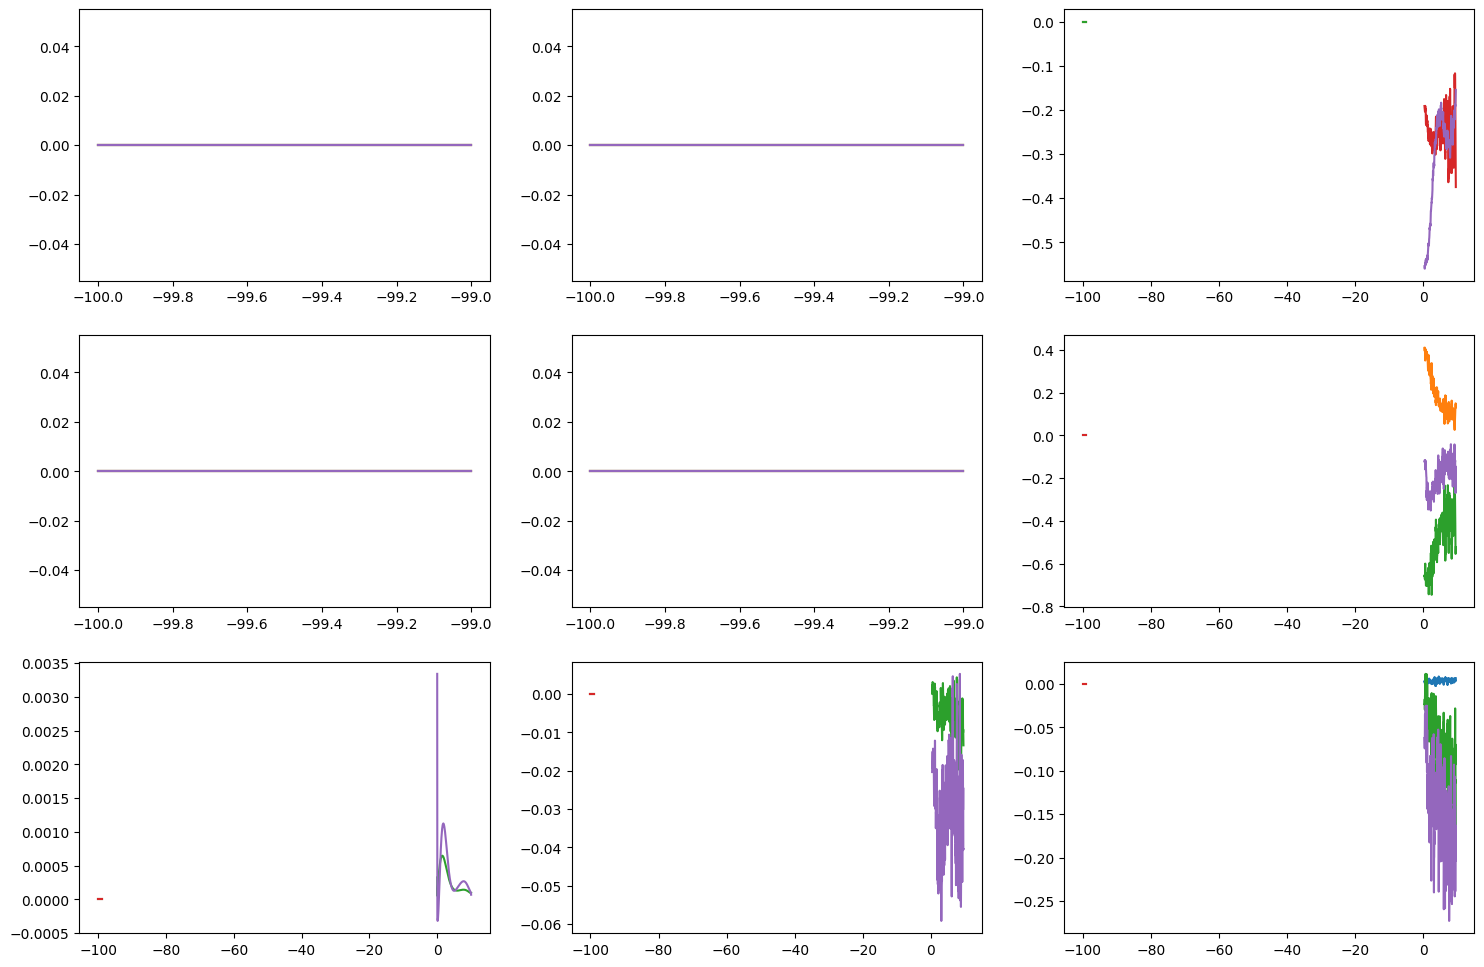

In [78]:
fig = figure(figsize = (18,12))
L = 8

for j in range(xi_true.shape[0]): 
    
    if np.linalg.norm(xi_bglss[j,:]) > 10**-10 or \
       np.linalg.norm(xi_lasso[j,:]) > 10**-10 or \
       np.linalg.norm(xi_sgtr[j,:]) > 10**-10 or \
       np.linalg.norm(xi_bglss_n[j,:]) > 10**-10 or \
       np.linalg.norm(xi_lasso_n[j,:]) > 10**-10 or \
       np.linalg.norm(xi_sgtr_n[j,:]) > 10**-10 or\
       np.linalg.norm(xi_bglss_n2[j,:]) > 10**-10 or \
       np.linalg.norm(xi_lasso_n2[j,:]) > 10**-10 or \
       np.linalg.norm(xi_sgtr_n2[j,:]) > 10**-10:
        
        subplot(3,3,1)
        if np.linalg.norm(xi_bglss[j,:]) > 10**-10:
            plot(t,xi_bglss[j,:], label = r'$'+rhs_des[j]+'$')
        else: plot([-100,-99], [0,0])
            
        subplot(3,3,2)
        if np.linalg.norm(xi_bglss_n[j,:]) > 10**-10:
            plot(t[wt:-wt], xi_bglss_n[j,:], label =  r'$'+rhs_des[j]+'$')
        else: plot([-100,-99], [0,0])
            
        subplot(3,3,3)
        if np.linalg.norm(xi_bglss_n2[j,:]) > 10**-10:
            plot(t[wt:-wt], xi_bglss_n2[j,:], label =  r'$'+rhs_des[j]+'$')
        else: plot([-100,-99], [0,0])
            
        subplot(3,3,4)
        if np.linalg.norm(xi_sgtr[j,:]) > 10**-10:
            plot(t,xi_sgtr[j,:], label = r'$'+rhs_des[j]+'$')
        else: plot([-100,-99], [0,0])
        
        subplot(3,3,5)
        if np.linalg.norm(xi_sgtr_n[j,:]) > 10**-10:
            plot(t[wt:-wt],xi_sgtr_n[j,:], label = r'$'+rhs_des[j]+'$')
        else: plot([-100,-99], [0,0])
            
        subplot(3,3,6)
        if np.linalg.norm(xi_sgtr_n2[j,:]) > 10**-10:
            plot(t[wt:-wt],xi_sgtr_n2[j,:], label = r'$'+rhs_des[j]+'$')
        else: plot([-100,-99], [0,0])
            
        subplot(3,3,7)
        if np.linalg.norm(xi_lasso[j,:]) > 10**-10:
            plot(t,xi_lasso[j,:], label = r'$'+rhs_des[j]+'$')
        else: plot([-100,-99], [0,0])
        
        subplot(3,3,8)
        if np.linalg.norm(xi_lasso_n[j,:]) > 10**-10:
            plot(t[wt:-wt],xi_lasso_n[j,:], label = r'$'+rhs_des[j]+'$')
        else: plot([-100,-99], [0,0])
            
        subplot(3,3,9)
        if np.linalg.norm(xi_lasso_n2[j,:]) > 10**-10:
            plot(t[wt:-wt],xi_lasso_n2[j,:], label = r'$'+rhs_des[j]+'$')
        else: plot([-100,-99], [0,0])
            


subplot(3,3,1); xlim([0, 10]); ylim([-1.4,0.2]); xticks(fontsize = 0); yticks(fontsize = fontsize); title(r'tBGL-SS, clean', fontsize = fontsize)
subplot(3,3,2); xlim([0, 10]); ylim([-1.4,0.2]); xticks(fontsize = 0); yticks([]); title(r'tBGL-SS, 1% $\sigma_u$ noise', fontsize = fontsize)
subplot(3,3,3); xlim([0, 10]); ylim([-1.4,0.2]); xticks(fontsize = 0); yticks([]); title(r'tBGL-SS, 5% $\sigma_u$ noise', fontsize = fontsize)
subplot(3,3,4); xlim([0, 10]); ylim([-1.4,0.2]); xticks(fontsize = 0); yticks(fontsize = fontsize); title(r'SGTR, clean', fontsize = fontsize)
subplot(3,3,5); xlim([0, 10]); ylim([-1.4,0.2]); xticks(fontsize = 0); yticks([]); title(r'SGTR,  1% $\sigma_u$ noise', fontsize = fontsize)
subplot(3,3,6); xlim([0, 10]); ylim([-1.4,0.2]); xticks(fontsize = 0); yticks([]); title(r'SGTR, 5% $\sigma_u$ noise', fontsize = fontsize)
subplot(3,3,7); xlim([0, 10]); ylim([-1.4,0.2]); xticks(fontsize = fontsize); yticks(fontsize = fontsize); xlabel(r'$t$', fontsize = fontsize+2); title(r'Group Lasso, clean', fontsize = fontsize)
subplot(3,3,8); xlim([0, 10]); ylim([-1.4,0.2]); xticks(fontsize = fontsize); yticks([]); xlabel(r'$t$', fontsize = fontsize+2); title(r'Group Lasso, 1% $\sigma_u$ noise', fontsize = fontsize)
subplot(3,3,9); xlim([0, 10]); ylim([-1.4,0.2]); xticks(fontsize = fontsize); yticks([]); xlabel(r'$t$', fontsize = fontsize+2); title(r'Group Lasso, 5% $\sigma_u$ noise', fontsize = fontsize)

subplot(3,3,1); ylabel(r'$\xi(t)$', fontsize = fontsize+2)
subplot(3,3,4); ylabel(r'$\xi(t)$', fontsize = fontsize+2)
subplot(3,3,7); ylabel(r'$\xi(t)$', fontsize = fontsize+2)
subplot(3,3,6); legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = fontsize+2)

fig.savefig("9algorithms.png", dpi=200)

In [ ]:
xi_bglss_n.shape